In [11]:
import pandas as pd
import numpy as np
import statistics
from statistics import mode
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from matplotlib.legend import _get_legend_handles_labels

In [12]:
df = pd.read_excel('/Users/senairemtoka/Downloads/ghg_emissions_with_gdp_population.xlsx')
df

,Country,Year,Energy,Oil and Natural Gas and Other Emissions from Energy Production,Industrial Processes and Product Use,Cement Production,Agriculture,Total GHG emissions without LULUCF,gdp,Population
0,Australia,1990,293.666652,13.815398,25.902442,3.462872,84.926982,425.624307,311420509067.627686,17065128
1,Australia,1991,295.406865,12.854818,25.083784,3.183033,84.13104,425.686445,325966686052.580627,17284036
2,Australia,1992,301.560685,13.548180,25.674840,2.923411,81.404156,429.473085,325518458076.533325,17478635
3,Australia,1993,304.891716,12.417866,25.403928,3.004698,79.40942,430.381731,312128302417.088318,17634808
4,Australia,1994,305.988750,12.374249,25.407542,3.484276,79.465416,430.848498,322802490487.72052,17805468
...,...,...,...,...,...,...,...,...,...,...
1147,United States of America,2017,5418.740173,312.735213,359.082409,40.323535,613.096608,6561.824440,19477336549000,325122128
1148,United States of America,2018,5589.457285,332.160758,362.175236,38.970745,629.494016,6754.831648,20533057312000,326838199
1149,United States of America,2019,5460.638447,347.283140,366.822710,40.895869,614.462111,6617.916876,21380976119000,328329953
1150,United States of America,2020,4893.979965,313.654453,363.206018,40.687747,597.264509,6025.973613,21060473613000,331511512


In [13]:
print('Data type per column:')
df.dtypes

Data type per column:


Country                                                            object
Year                                                                int64
Energy                                                            float64
Oil and Natural Gas and Other Emissions from Energy Production    float64
Industrial Processes and Product Use                              float64
Cement Production                                                  object
Agriculture                                                        object
Total GHG emissions without LULUCF                                float64
gdp                                                                object
Population                                                          int64
dtype: object

In [14]:

columns_to_convert = df.columns.difference(['Country'])

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [15]:
df.dtypes

Country                                                            object
Year                                                                int64
Energy                                                            float64
Oil and Natural Gas and Other Emissions from Energy Production    float64
Industrial Processes and Product Use                              float64
Cement Production                                                 float64
Agriculture                                                       float64
Total GHG emissions without LULUCF                                float64
gdp                                                               float64
Population                                                          int64
dtype: object

In [16]:
print('The missing values in the original dataset per column:')
df.isna().sum()

The missing values in the original dataset per column:


Country                                                            0
Year                                                               0
Energy                                                             0
Oil and Natural Gas and Other Emissions from Energy Production     0
Industrial Processes and Product Use                               0
Cement Production                                                 45
Agriculture                                                       32
Total GHG emissions without LULUCF                                 0
gdp                                                               11
Population                                                         0
dtype: int64

In [17]:
print('There are {} Unique countries in the dataset before cleaning, they include:'.format(len(df['Country'].unique())))
print(df['Country'].unique())

There are 36 Unique countries in the dataset before cleaning, they include:
['Australia' 'Austria' 'Belgium' 'Bulgaria' 'Canada' 'Croatia' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Japan' 'Kazakhstan' 'Luxembourg' 'Monaco'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'Slovakia' 'Spain' 'Sweden' 'Switzerland' 'Türkiye'
 'Ukraine' 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']


In [18]:
countries_with_missing_values = df[df.isnull().any(axis=1)]['Country'].unique()
df_cleaned = df[~df['Country'].isin(countries_with_missing_values)]

print("Remaining missing values per column:")
print(df_cleaned.isnull().sum())


Remaining missing values per column:
Country                                                           0
Year                                                              0
Energy                                                            0
Oil and Natural Gas and Other Emissions from Energy Production    0
Industrial Processes and Product Use                              0
Cement Production                                                 0
Agriculture                                                       0
Total GHG emissions without LULUCF                                0
gdp                                                               0
Population                                                        0
dtype: int64


In [19]:
df_cleaned

,Country,Year,Energy,Oil and Natural Gas and Other Emissions from Energy Production,Industrial Processes and Product Use,Cement Production,Agriculture,Total GHG emissions without LULUCF,gdp,Population
0,Australia,1990,293.666652,13.815398,25.902442,3.462872,84.926982,425.624307,3.114205e+11,17065128
1,Australia,1991,295.406865,12.854818,25.083784,3.183033,84.131040,425.686445,3.259667e+11,17284036
2,Australia,1992,301.560685,13.548180,25.674840,2.923411,81.404156,429.473085,3.255185e+11,17478635
3,Australia,1993,304.891716,12.417866,25.403928,3.004698,79.409420,430.381731,3.121283e+11,17634808
4,Australia,1994,305.988750,12.374249,25.407542,3.484276,79.465416,430.848498,3.228025e+11,17805468
...,...,...,...,...,...,...,...,...,...,...
1147,United States of America,2017,5418.740173,312.735213,359.082409,40.323535,613.096608,6561.824440,1.947734e+13,325122128
1148,United States of America,2018,5589.457285,332.160758,362.175236,38.970745,629.494016,6754.831648,2.053306e+13,326838199
1149,United States of America,2019,5460.638447,347.283140,366.822710,40.895869,614.462111,6617.916876,2.138098e+13,328329953
1150,United States of America,2020,4893.979965,313.654453,363.206018,40.687747,597.264509,6025.973613,2.106047e+13,331511512


In [10]:
df_cleaned.to_excel("/Users/senairemtoka/Downloads/bitmiş datalar/GHGcleaned.xlsx", index=False)


In [20]:
log_divided_df = np.log(df_cleaned.drop(columns=['Country', 'Year']))

log_divided_df[['Country', 'Year']] = df_cleaned[['Country', 'Year']]

log_divided_df = log_divided_df[['Country', 'Year', 'Energy', 'Oil and Natural Gas and Other Emissions from Energy Production',
                                 'Industrial Processes and Product Use', 'Cement Production', 'Agriculture',
                                 'Total GHG emissions without LULUCF', 'gdp', 'Population']]

log_divided_df


,Country,Year,Energy,Oil and Natural Gas and Other Emissions from Energy Production,Industrial Processes and Product Use,Cement Production,Agriculture,Total GHG emissions without LULUCF,gdp,Population
0,Australia,1990,5.682445,2.625784,3.254337,1.242098,4.441792,6.053557,26.464410,16.652548
1,Australia,1991,5.688354,2.553719,3.222222,1.157834,4.432376,6.053703,26.510061,16.665294
2,Australia,1992,5.708971,2.606252,3.245512,1.072751,4.399426,6.062559,26.508685,16.676490
3,Australia,1993,5.719957,2.519136,3.234904,1.100177,4.374617,6.064673,26.466680,16.685385
4,Australia,1994,5.723548,2.515618,3.235046,1.248260,4.375322,6.065757,26.500306,16.695016
...,...,...,...,...,...,...,...,...,...,...
1147,United States of America,2017,8.597619,5.745357,5.883552,3.696935,6.418523,8.789024,30.600273,19.599711
1148,United States of America,2018,8.628637,5.805619,5.892128,3.662811,6.444916,8.818013,30.653057,19.604976
1149,United States of America,2019,8.605321,5.850140,5.904879,3.711029,6.420747,8.797536,30.693523,19.609530
1150,United States of America,2020,8.495761,5.748292,5.894970,3.705927,6.392360,8.703834,30.678419,19.619173


In [21]:
print('The missing values in the log transformation dataset per column:')
log_divided_df.isna().sum()

The missing values in the log transformation dataset per column:


Country                                                           0
Year                                                              0
Energy                                                            0
Oil and Natural Gas and Other Emissions from Energy Production    0
Industrial Processes and Product Use                              0
Cement Production                                                 0
Agriculture                                                       0
Total GHG emissions without LULUCF                                0
gdp                                                               0
Population                                                        0
dtype: int64

In [22]:
log_countries_with_missing_values = log_divided_df[log_divided_df.isnull().any(axis=1)]['Country'].unique()
log_divided_df = log_divided_df[~log_divided_df['Country'].isin(log_countries_with_missing_values)]

print("Remaining missing values per column:")
print(log_divided_df.isnull().sum())


Remaining missing values per column:
Country                                                           0
Year                                                              0
Energy                                                            0
Oil and Natural Gas and Other Emissions from Energy Production    0
Industrial Processes and Product Use                              0
Cement Production                                                 0
Agriculture                                                       0
Total GHG emissions without LULUCF                                0
gdp                                                               0
Population                                                        0
dtype: int64


In [23]:
print('There are {} Unique countries after cleaning the log transformation dataset, they include:'.format(len(log_divided_df['Country'].unique())))
print(log_divided_df['Country'].unique())

There are 30 Unique countries after cleaning the log transformation dataset, they include:
['Australia' 'Austria' 'Belgium' 'Bulgaria' 'Canada' 'Czechia' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'Luxembourg' 'New Zealand' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russian Federation' 'Slovakia' 'Spain' 'Sweden' 'Switzerland'
 'Türkiye' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']


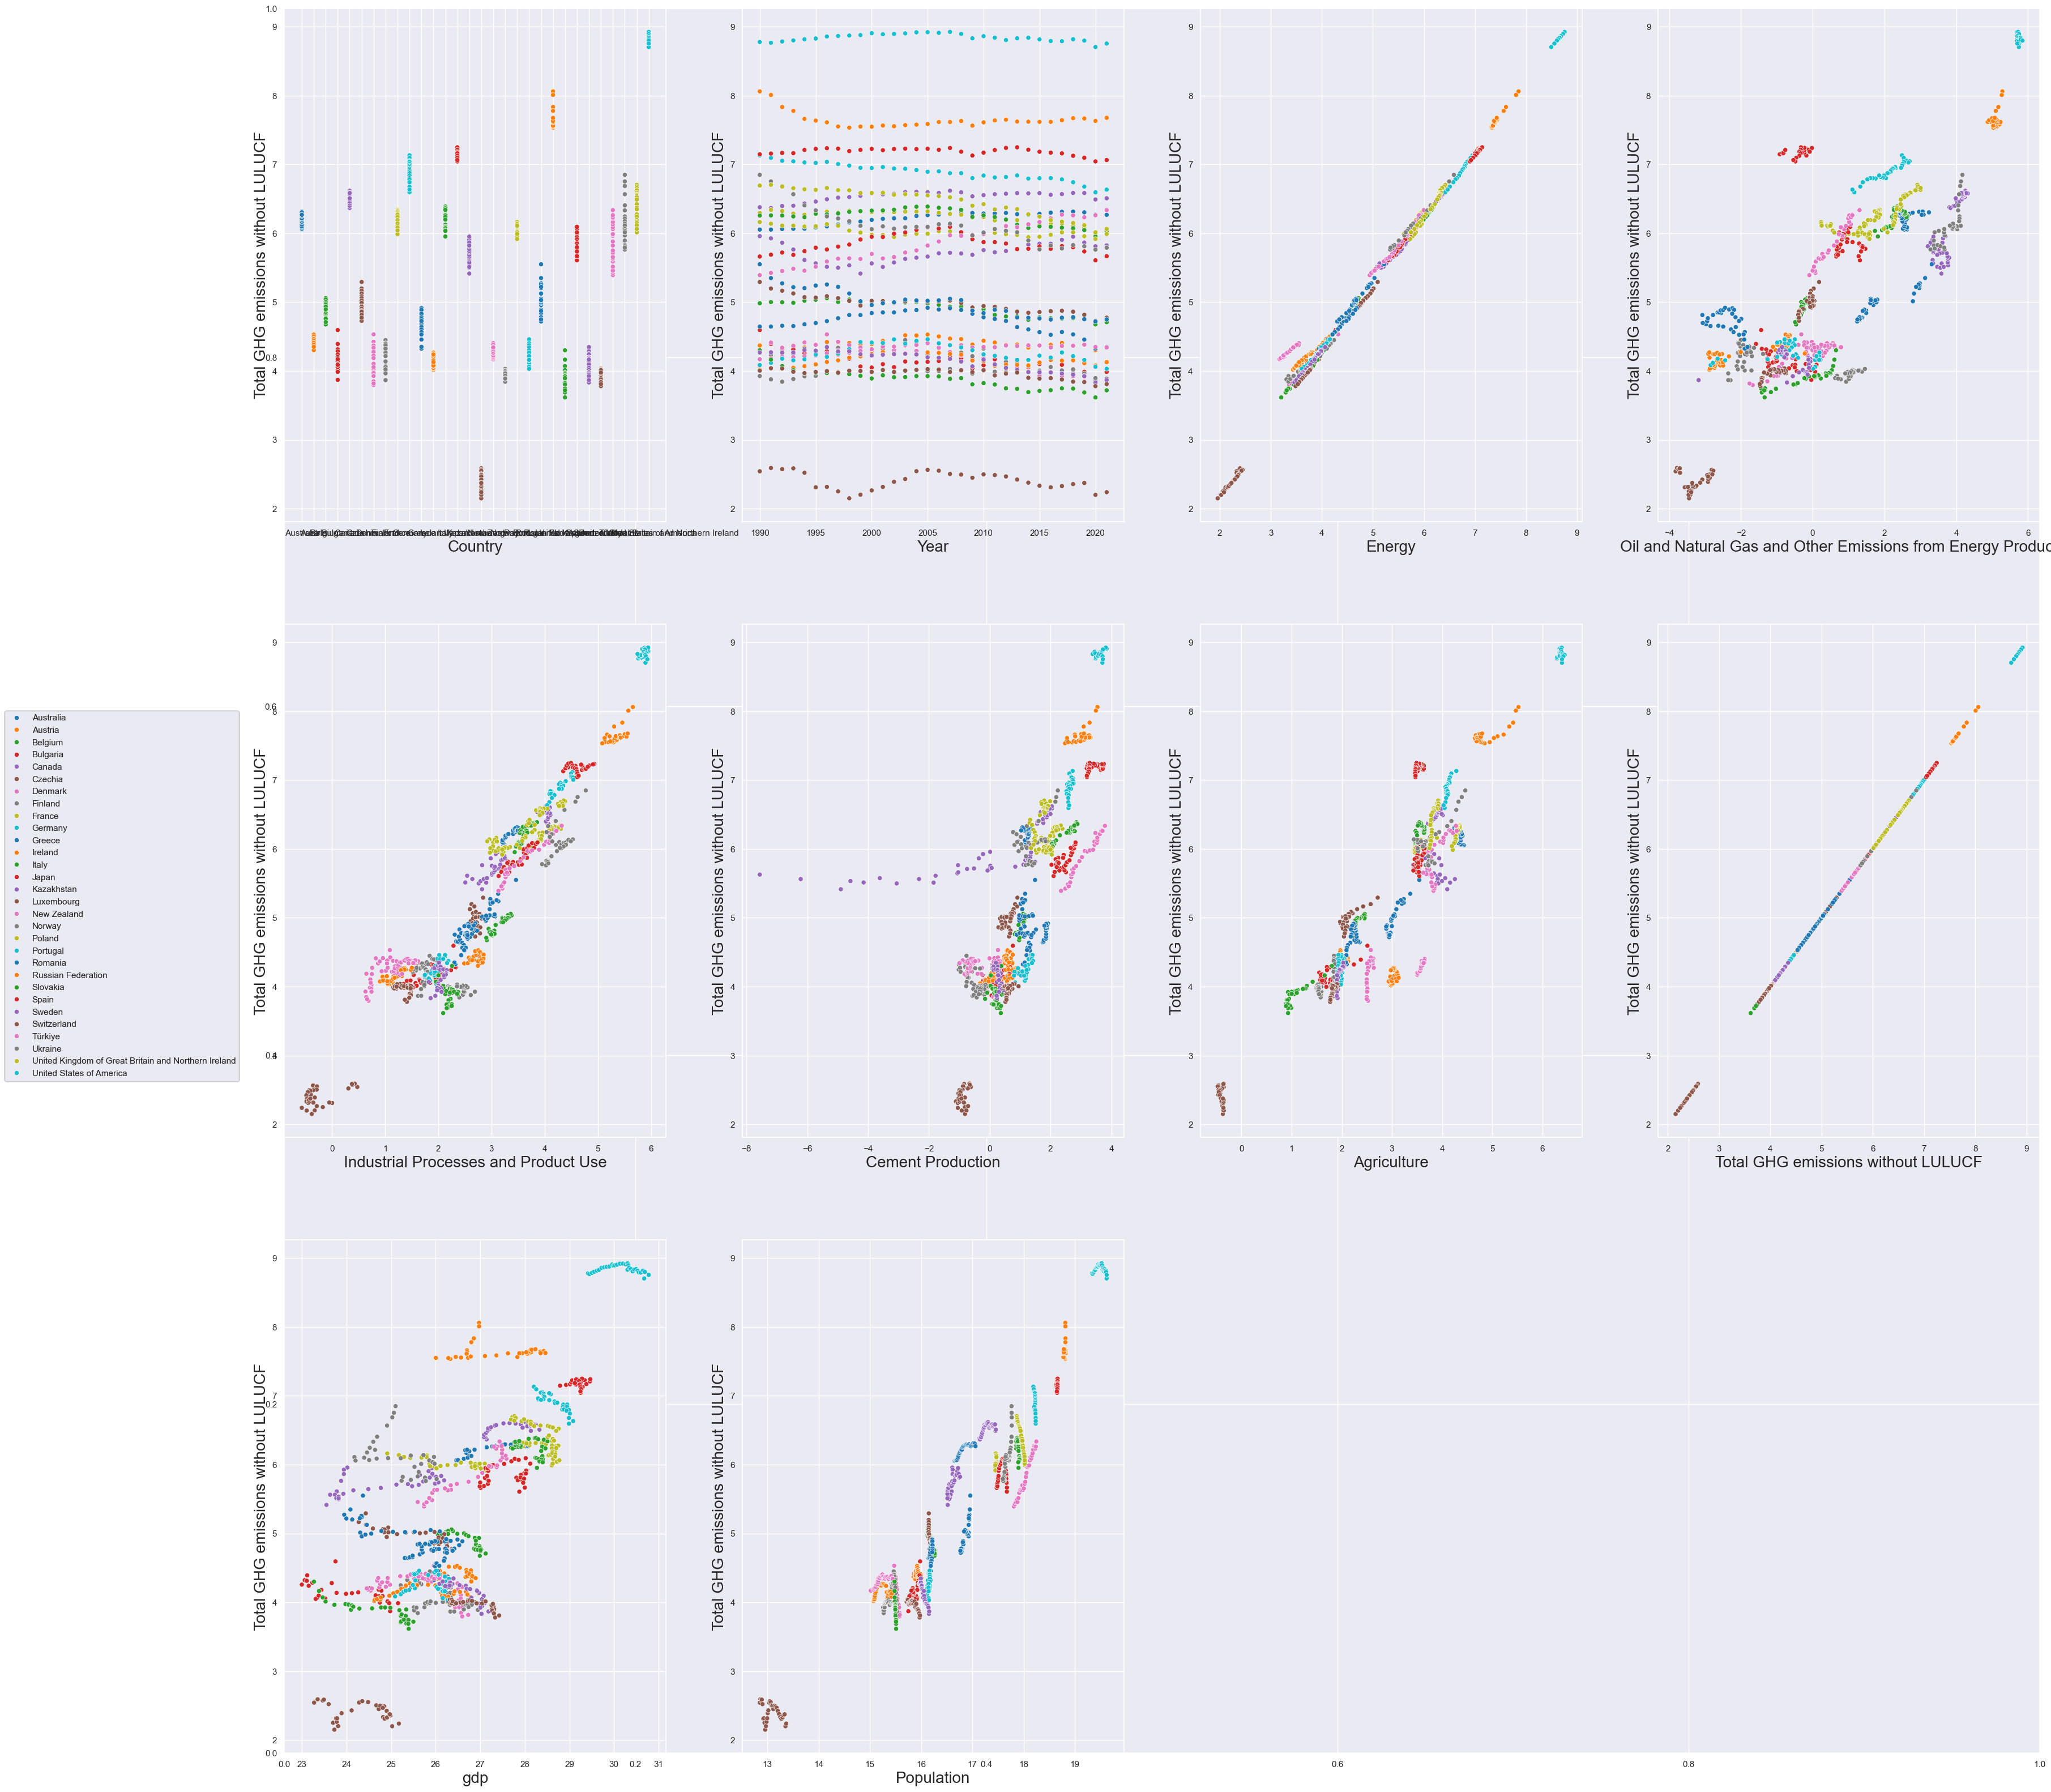

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def outlier_plot(data):
    sns.set()

    larger_palette = sns.color_palette("tab10", n_colors=len(data['Country'].unique()))

    fig, ax = plt.subplots(figsize=(40, 40))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    index = 1
    sns.set_context("notebook")
    sns.set(color_codes=True, font_scale=1)
    for col in data.columns:
        ax = fig.add_subplot(3, 4, index)
        sns.scatterplot(ax=ax, x=col, y='Total GHG emissions without LULUCF', data=data, hue="Country", palette=larger_palette)
        ax.legend_.remove()
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel('Total GHG emissions without LULUCF', fontsize=20)
        index += 1
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='center left')

outlier_plot(log_divided_df)


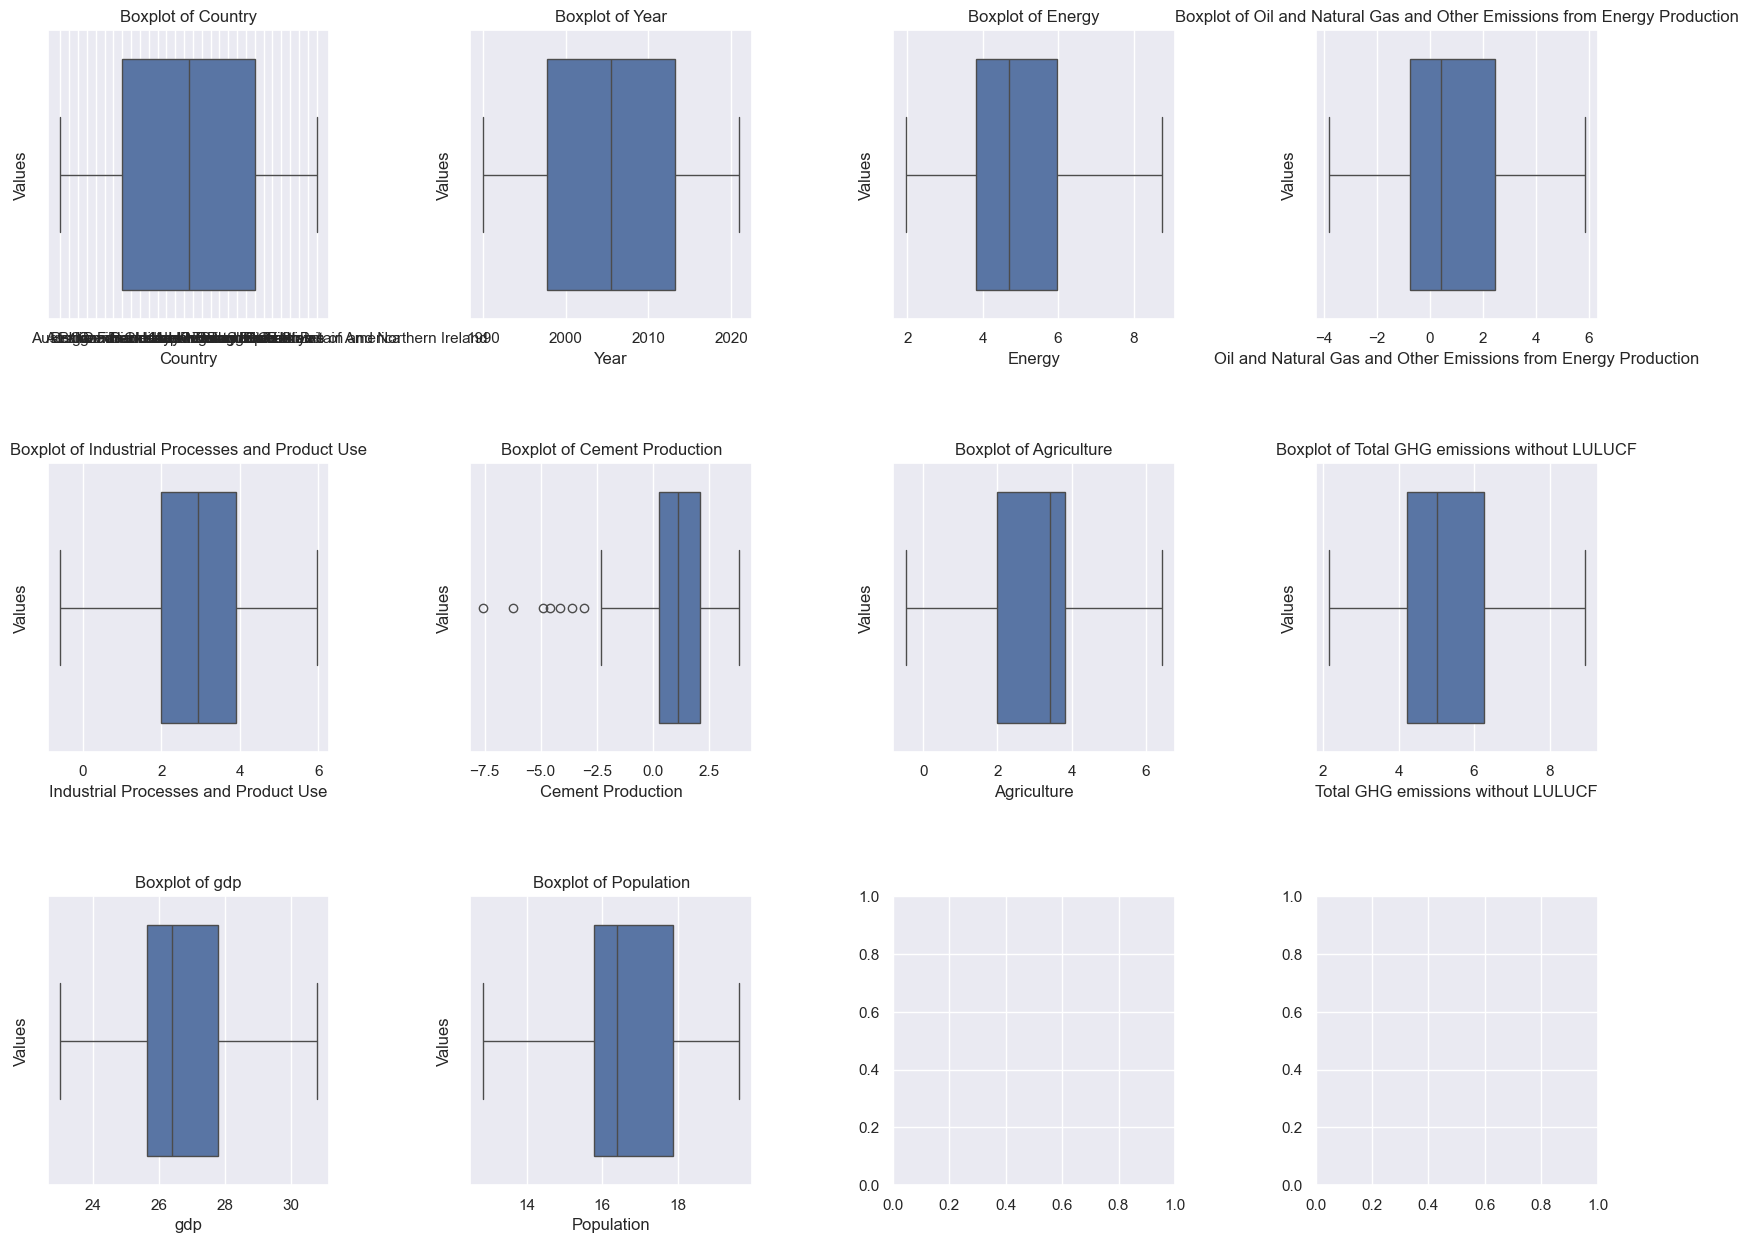

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def outlier_boxplot(data):
    sns.set()

    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, col in enumerate(data.columns):
        sns.boxplot(x=data[col], ax=axes[i//4, i%4])
        axes[i//4, i%4].set_title(f'Boxplot of {col}')
        axes[i//4, i%4].set_xlabel(col)
        axes[i//4, i%4].set_ylabel('Values')

    plt.show()

outlier_boxplot(log_divided_df)

In [27]:
log_divided_df.describe()

,Year,Energy,Oil and Natural Gas and Other Emissions from Energy Production,Industrial Processes and Product Use,Cement Production,Agriculture,Total GHG emissions without LULUCF,gdp,Population
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,2005.500000,5.011898,0.794931,2.909998,-inf,2.995571,5.314034,26.590747,16.703611
std,9.237905,1.425834,2.256889,1.349297,NaN,1.313225,1.367516,1.545614,1.349625
min,1990.000000,1.960102,-3.819069,-0.569264,-inf,-0.474977,2.150701,22.995125,12.852783
25%,1997.750000,3.813177,-0.753692,1.981679,0.252226,1.981968,4.225129,25.620395,15.785343
50%,2005.500000,4.706900,0.414190,2.934936,1.130642,3.427636,5.014129,26.392729,16.389698
75%,2013.250000,5.974669,2.447955,3.913167,2.073823,3.830256,6.268107,27.796578,17.860421
max,2021.000000,8.756451,5.850140,5.956147,3.846967,6.444916,8.924184,30.780122,19.620741


In [28]:
import plotly.express as px

columns_to_plot = [col for col in log_divided_df.columns if col not in ['Year', 'Country']]
colors = px.colors.qualitative.Set3[:len(log_divided_df['Country'].unique())]

for column_to_plot in columns_to_plot:
    fig = px.line(log_divided_df, x='Year', y=column_to_plot, color='Country', color_discrete_sequence=colors, title='Plot of {} for Each Country'.format(column_to_plot), markers=True)

    fig.update_layout(
        legend=dict(
            orientation="h",  
            yanchor="bottom", 
            y=1.02,  
            xanchor="right",  
            x=1,  
        ),
        title=dict(
            y=1  
        ),
        hovermode="closest",  
        xaxis_title="Year",
        yaxis_title=column_to_plot,
        xaxis=dict(tickangle=-90),  
    )

    fig.show()


In [42]:
log_divided_df.to_excel("/Users/senairemtoka/Downloads/bitmiş datalar/GHGlogtransformated.xlsx", index=False)
